# Detección de anomalías

La detección de anomalías o *outliers* trata de identificar los elementos que se salen de la distribución de los datos, o lo que es lo mismo, puntos que tienen patrones que se desvían del comportamiento esperado. No existe una definición formal del comportamiento anormal ya que depende del problema. Al ser un problema de aprendizaje no supervisado, no se tienen las respuestas, así que se recomienda aplicar varios métodos y quedarse con el que mejor se adapte a nuestras necesidades.

Existen técnicas básicas que pueden ser usadas para detectar anomalías como el [puntaje z](https://en.wikipedia.org/wiki/Standard_score) o un análisis de quartiles, donde los atos que se desvíen demasiado se pueden marcar como outliers.

## Aplicaciones

Las aplicaciones son muy variadas y a continuación se presentan algunas de las más conocidas.

### Detección de errores en los datos.
Al recolectar datos de manera manual o automática, es muy común que se presenten errores humanos o en los dispositivos de captura. Este tipo de datos pueden ser identificados y removidos para tener una mejor calidad de nuestras colecciones.


### Limpieza y depuración del conjunto de datos.
Los datos que se salen de la norma pueden causar que los algoritmos de aprendizaje automático tengan comportamientos inapropiados. Se recomienda primero hacer una limpieza y muchas veces es mejor ignorar los ejemplos que son demasiado raros.

### Detección de fraudes bancarios.
En el problema de detección de fraudaes con tarjetas de crédito o débito lo que se busca es identificar comportamientos *sospechosos*. Estos comportamientos varían de persona a persona, es fácil imaginar que los patrones de una persona rica sean diferentes que los de una con escasos recursos. Para los bancos es mejor identificar un posble caso de fraude y llamar a su cliente para confirmar la operación. Es más barato preguntar que atender un reclamo semanas después de que ocurrió un delito. La detección de anomalías se usa para resolver este tipo de problemas.

### Ciber seguridad.
El problema es parecido al de fraudes bancarios, donde se tiene un comportamiento esperado del sistema y si se perciben situaciones fuera de lo común, se dispara una alerta de un posible ataque.

### Medicina.
El caso particular de los datos médicos, deben ser tratados por especialistas pero con la detección de anomalías se pueden identificar fallos en los exámenes médicos o expedientes corruptos. Los casos deben ser evaluados y las medidas correctivas necesarias se tendrán que aplicar.

## Métodos

Existen varios métodos que se pueden usar para detectar anomalías, desde los muy sencillos hasta los más complejos. A continuación veremos algunos de los más usados. Primero crearemos un conjunto de datos sencillo para comparar los resultados.





In [6]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest


Note que tenemos puntos agrupados en tres cúmulos y algunos elementos *flotando* al rededor. En este caso es fácil indentificar los puntos que podríamos marcar como anomalías.

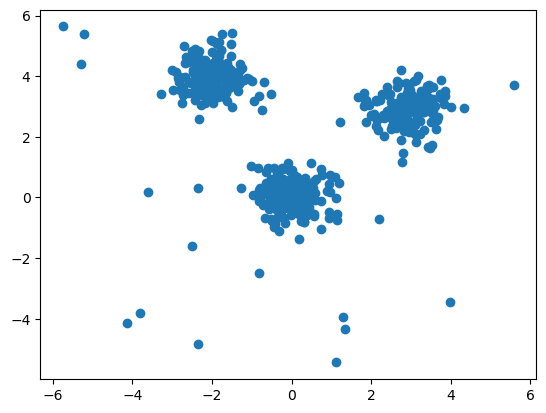

In [7]:
rng = np.random.RandomState(42)
X, _ = make_blobs(500,2,random_state=0, centers=[[0, 0], [3, 3], [-2,4]], cluster_std=0.5)
outliers = rng.uniform(low=-6, high=6, size=(20, 2))
X = np.concatenate([X, outliers], axis=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

### DBSCAN

Como ya lo vimos, el método DBSCAN tiene la cualidad de marcar como outliers los puntos que se encuentran alejados de todos los demás. Esto lo hace un método para detectar anomalías si ignoramos la parte de agrupación. Los puntos en magenta son los que se clasificaron como anomalías. Note que dependiendo de los parámetros (`eps` y `min_samples`), se pueden obtner diferentes resultados.

> **_Actividad:_**  Variar los parámetros y observar los cambios en la clasificación de puntos como anomalías.



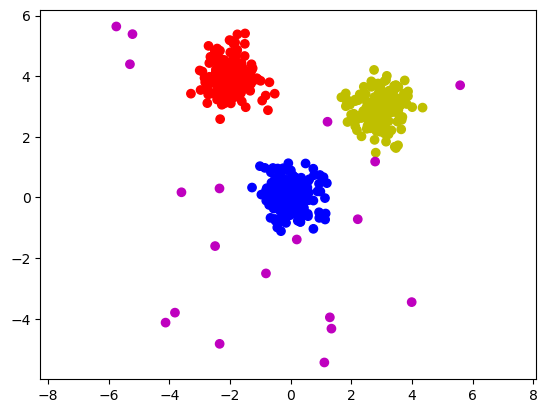

In [8]:
color = np.array(["r", "b", "y", "g", "k", "c", "orange", "tomato", "gray", "m"])
y_c = DBSCAN(eps=.5, min_samples=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=color[y_c])
plt.axis('equal')
plt.show()

## Local Outlier Factor

El método de [Local Outlier Factor](https://www.dbs.ifi.lmu.de/Publikationen/Papers/LOF.pdf) usa la densidad de los puntos para identificar los que están aislados y marcarlos como anomalías. El concepto es parecido al de DBSCAN. La densidad se estima usando las distancias a los vecinos cercanos.

Se compara la densidad de un punto con la de sus vecinos cercanos para encontrar regiones con la misma densidad. Los puntos que tienen una densidad mucho menor que las de sus vecinos son marcados como anomalías.

Sea $d_k(x)$ la distancia de $x$ a su $k$ vecino cercano. La **distancia de alcance** $DA_k(x,y)$ se define como:

$$DA_k(x,y) = \max \left\{ d_k(y), d(x,y)\right\} $$

donde $d$ es la función distancia. Sea $N_k(x)$ el conjunto $\{y\ne x|d(x,y)\le d_k(x)\}$. Definimos la distancia de alcance local como

$$lrd_k(x) = \frac{|N_k(x)|}{\sum_{y\in N_k(x)}DA_k(x,y)}$$

es el inverso del promedio de las ditancias de alacance de los vecinos de $x$. Finalmente, se define

$$LOF_k(x) = \frac{1}{|N_k(x)|\cdot lrd_k(x)} \sum_{y\in N_k(x)}lrd_k(y)$$

La detección se hace mediante los siguientes casos:

- $LOF_k(x) \sim 1$ significa que los vecinos tienen densidad parecida.

- $LOF_k(x) < 1$ quiere decir que el punto $x$ tiene una densidad mayor que la de sus vecinos, por lo que se podría considerar un *centro*.

- $LOF_k(x) > 1$ nos dice que $x$ tiene menor densidad que sus vecinos por lo que se podría considerar que está en una *orilla*.

A continuación se muestra un ejemplo del uso de Local Outlier Factor para el conjunto de datos variando el parámetro $k$. El parámetro `contamination` indica la proporción de anomalías en los datos.

> **_Actividad:_** Variar el parámetro `contamination` y compara los resultados.

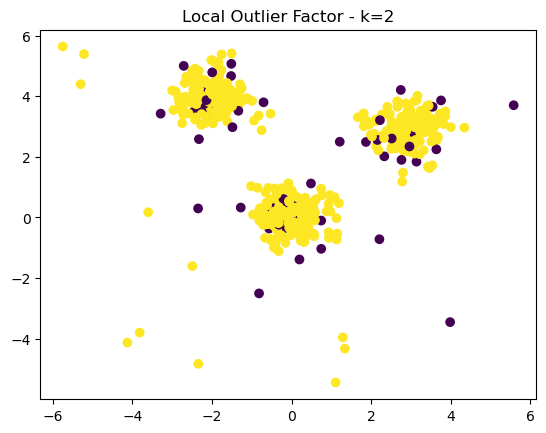

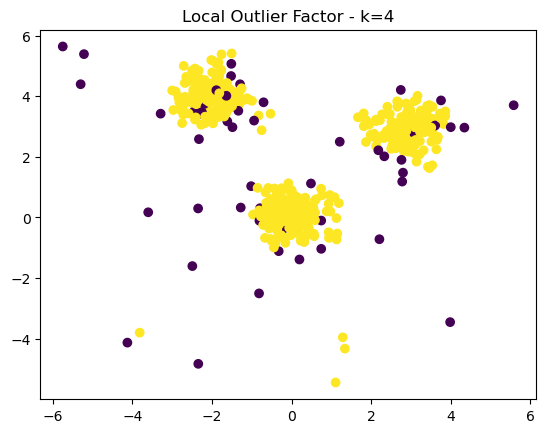

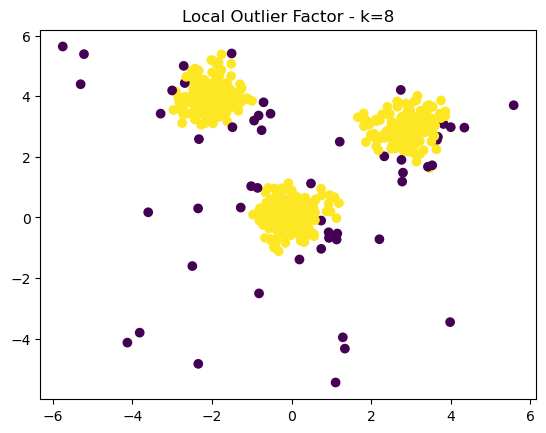

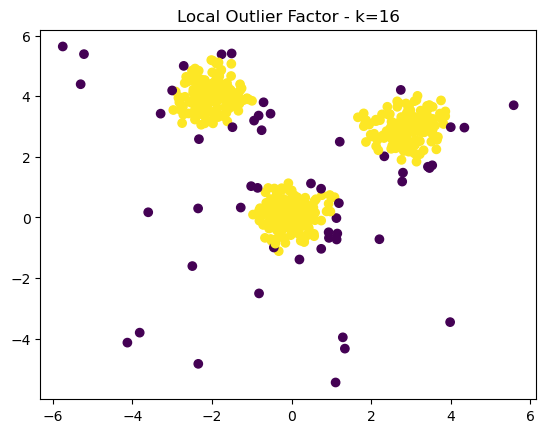

In [9]:
for n in [2,4,8,16]:
  clf = LocalOutlierFactor(n_neighbors=n, contamination=.1)
  outliers = clf.fit_predict(X)
  plt.scatter(X[:,0], X[:,1], c=outliers)
  plt.title(f"Local Outlier Factor - k={n}")
  plt.show()


## Máquina de Vectores de Soporte de una clase

La [Máquina de Vectores de Soporte de una clase](https://ieeexplore.ieee.org/abstract/document/6790022) (One class SVM) es una SVM que tiene como finalidad identificar la clase *normal* de los datos, esto es, busca identificar puntos que se desvían de manera considerable de la norma. Una [SVM normal](https://es.wikipedia.org/wiki/M%C3%A1quina_de_vectores_de_soporte) parte el espacio usando hiperplanos que buscan separar los puntos entre diferentes clases. Usa el truco del kernel para llevar los datos a un espacio de alta dimensión donde se pueden separar en clases usando hiperplanos. Para el caso de una clase, también se inyectan los datos a un espacio multidimensional donde se busca dejar la mayoría de los datos normales de un lado del hiperplano y las anomalías del otro.

One class SVM define una frontera entre los datos normales y las anomalías. Se concentra en la clase mayoritaria y asigna un valor que indica la probabilidad de que un punto sea anomalía. Supone que la mayoría de los datos va a ser normales y los anormales son un porcentaje muy pequeño. Como en la SVM usual, la One class SVM busca maximizar el margen de separación del hiperplano. El hiperparámetro `nu` es una cota superior de los errores al hacer la separación, debe ser un número entre 0 y 1.

A continuación se muestra un ejemplo del uso de One class SVM con kernel rbf variando el parámetro `nu`.

> **_Actividad:_** Usar los kernels `linear` y `poli` para comparar con el `rbf`.

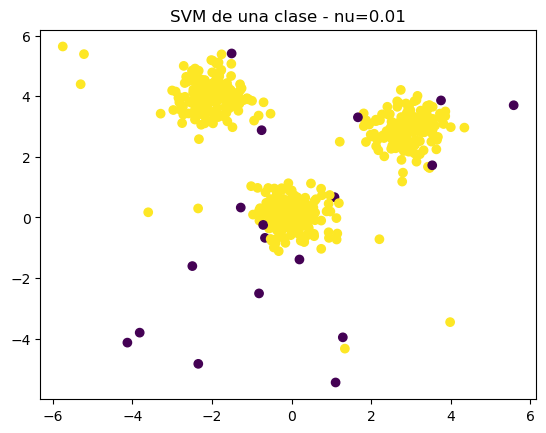

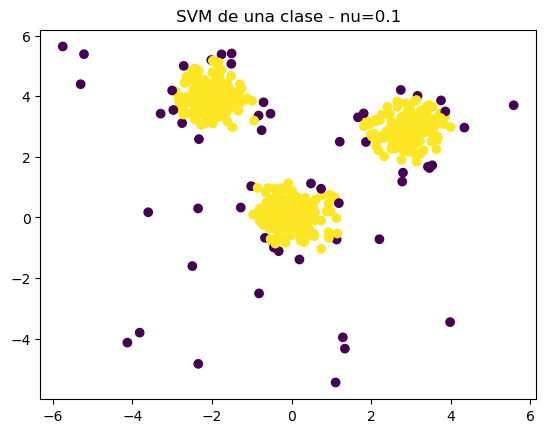

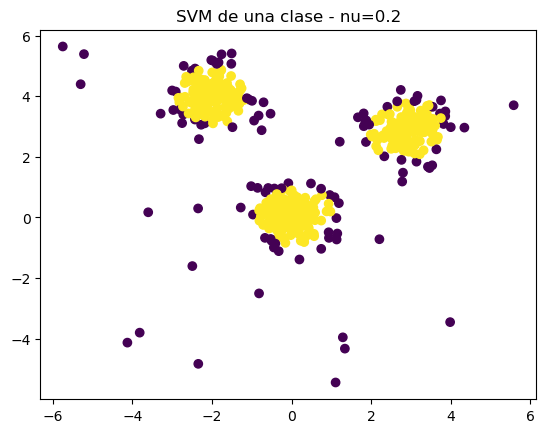

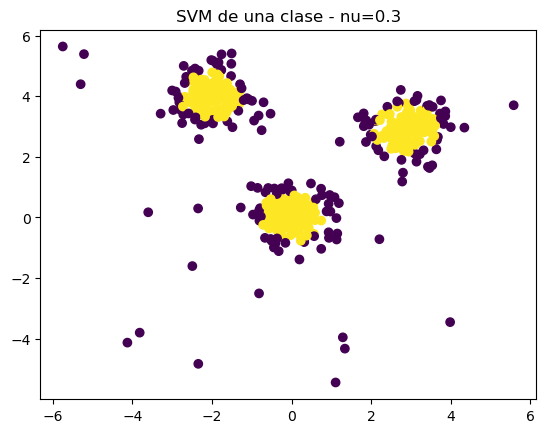

In [10]:
for nu in [.01, .1, .2, .3]:
    clf = OneClassSVM(kernel='rbf', gamma='auto', nu=nu).fit(X)
    outliers = clf.predict(X)
    plt.scatter(X[:,0], X[:,1], c=outliers)
    plt.title(f"SVM de una clase - nu={nu}")
    plt.show()

La implementación de la SVM de una clase incluye el método `decision_score` que devuelve la distancia con signo de cada punto al hiperplano separador. Distancias positivas indican puntos normales y negativas para las anomalías.

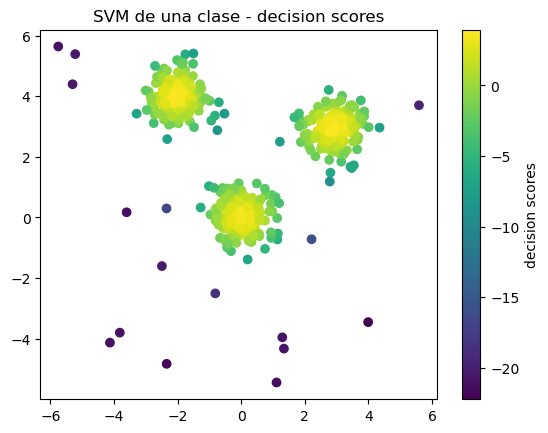

In [11]:
decision_scores = clf.decision_function(X)
plt.scatter(X[:,0], X[:,1], c=decision_scores)
plt.title(f"SVM de una clase - decision scores")
plt.colorbar(label='decision scores')
plt.show()

## Bosque de aislamiento

El método de Bosque de aislamiento ([Isolation Forest](https://ieeexplore.ieee.org/document/4781136)) usa árboles binarios para clasificar a las anomalías. Es un método que requiere bajos recursos tanto en complejidad como en uso de memoria. Se basa en la idea de que los puntos anómalos se pueden separar fácilmente del resto y que los puntos que están dentro de un cluster requieren más particiones para aislarlos.

Dado un conjunto de datos, el algoritmo funciona de la siguiente manera:

- Se crea árbol binario donde cada nodo interno parte los datos tomando un atributo $q$ y un valor $p$ al azar y haciendo la separación mediante la prueba $q< p$, si se cumple se va a la izquierda y si no, se va a la derecha.

- La partición se sigue hasta que los nodos tienen un solo valor.

Se crean varios árboles de esta manera. Al momento de predecir las anomlías, se pasan por todos los árboles y se identifican los puntos necesitaron una menor cantidad de particiones para ser aislados. Estos puntos deben ser los atípicos.

A continuación se muestra un ejemplo del uso de Isolation Forest variando el parámetro `contamination`.

> **_Actividad:_** Variar los parámetros `n_estimators` y `max_samples` ([ver documentación](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest)) para observar sus efectos.


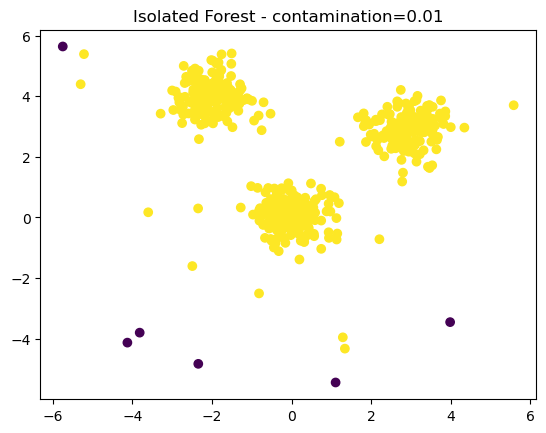

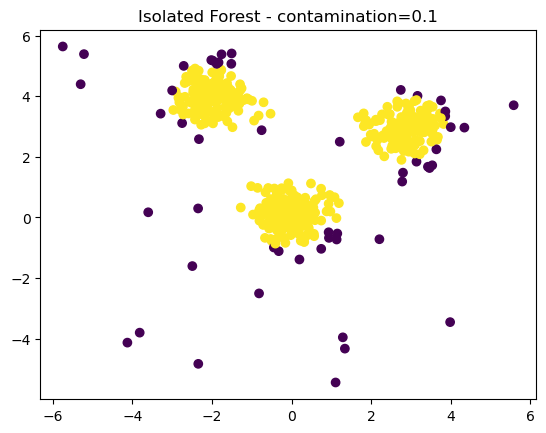

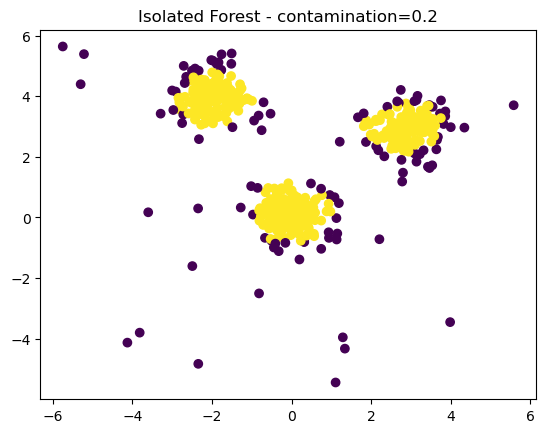

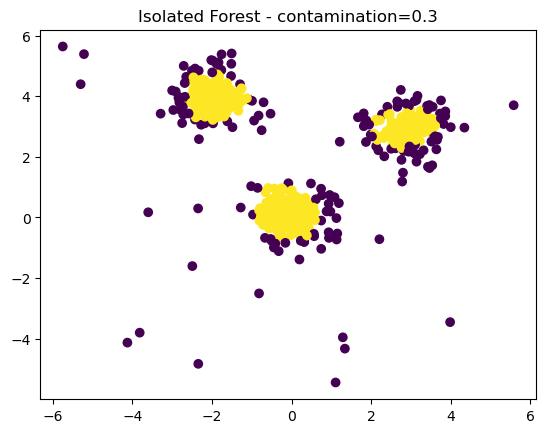

In [12]:
for contamination in [.01, .1, .2, .3]:
    clf = IsolationForest(contamination=contamination, random_state=42).fit(X)
    outliers = clf.predict(X)
    plt.scatter(X[:,0], X[:,1], c=outliers)
    plt.title(f"Isolated Forest - contamination={contamination}")
    plt.show()

Al igual que con la SVM de una clase, Isolated Forest también tiene la opción de conocer la función de decisión.

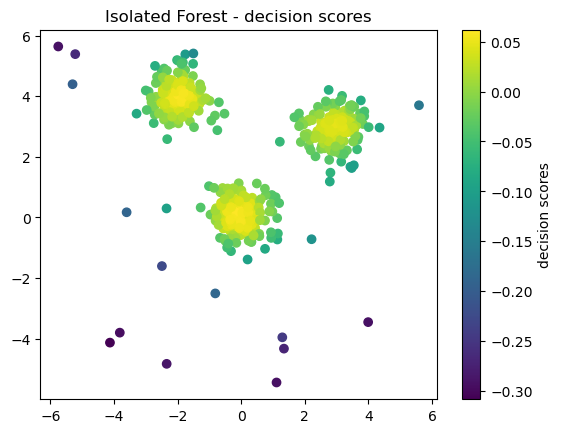

In [13]:
decision_scores = clf.decision_function(X)
plt.scatter(X[:,0], X[:,1], c=decision_scores)
plt.title(f"Isolated Forest - decision scores")
plt.colorbar(label='decision scores')
plt.show()